In [77]:
#Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df=pd.read_csv('dataset/data_date.csv')

In [79]:
df['Country'] = df['Country'].astype('category').cat.codes

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df['Status'] = df['Status'].astype('category').cat.codes

In [80]:
#selecting the features and target column
X = df[['Country', 'Year', 'Month', 'Day', 'Status']]
y = df['AQI Value'] 

In [81]:
# Splitting the data into 80% training, 15% validation, and 15% test 
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.75, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

In [ ]:
print("Validation Set Evaluation:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_val, y_val_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_val, y_val_pred))
print("R-squared (R2):", r2_score(y_val, y_val_pred))

Validation Set Evaluation:
Mean Absolute Error (MAE): 15.704107284864504
Mean Squared Error (MSE): 693.2084356086975
R-squared (R2): 0.6841418047423347


In [84]:
print("\nTest Set Evaluation:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_test_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_test_pred))
print("R-squared (R2):", r2_score(y_test, y_test_pred))


Test Set Evaluation:
Mean Absolute Error (MAE): 16.20430776701159
Mean Squared Error (MSE): 983.3531823699685
R-squared (R2): 0.5858501089534236


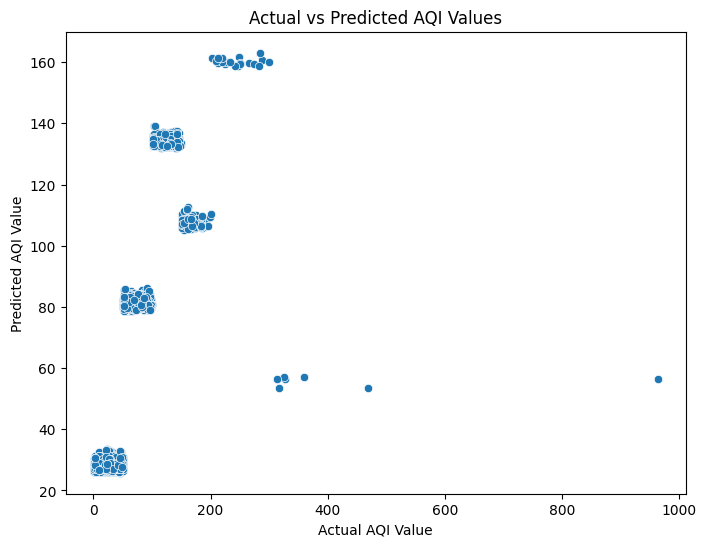

In [85]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.title('Actual vs Predicted AQI Values')
plt.xlabel('Actual AQI Value')
plt.ylabel('Predicted AQI Value')
plt.show()

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# Example: Ridge Regression Hyperparameter Tuning
param_grid = {
    'alpha': [0.1, 1, 10, 100]  # Regularization strength for Ridge regression
}
ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

print("Best Hyperparameters for Ridge:", grid_search_ridge.best_params_)
best_ridge_model = grid_search_ridge.best_estimator_

# Evaluate on test set
y_test_pred_ridge = best_ridge_model.predict(X_test)
print("R-squared (R2) for Ridge:", r2_score(y_test, y_test_pred_ridge))

Best Hyperparameters for Ridge: {'alpha': 10}
R-squared (R2) for Ridge: 0.5858416468751089



Training Linear Regression...
Validation Set Evaluation for Linear Regression:
Mean Absolute Error (MAE): 16.273152005679783
Mean Squared Error (MSE): 703.1469428840363
R-squared (R2): 0.6406689902528127

Test Set Evaluation for Linear Regression:
Mean Absolute Error (MAE): 16.606318009711202
Mean Squared Error (MSE): 790.0993880350228
R-squared (R2): 0.6364005315801136


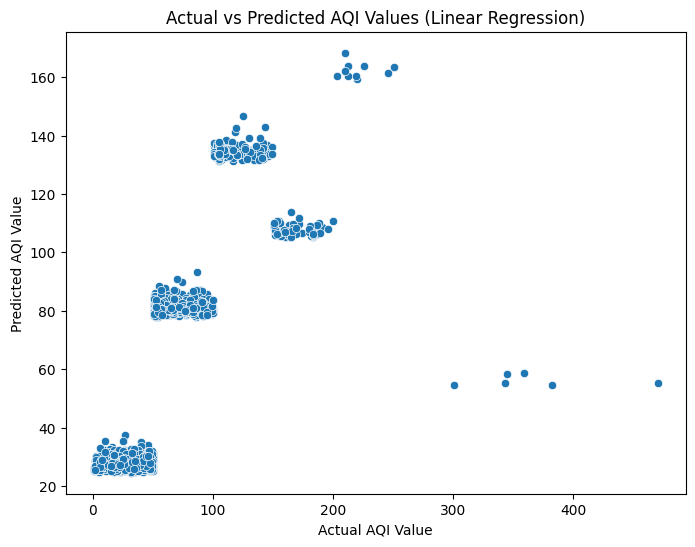


Training Ridge Regression...
Validation Set Evaluation for Ridge Regression:
Mean Absolute Error (MAE): 16.27275337519235
Mean Squared Error (MSE): 703.1420432911641
R-squared (R2): 0.6406714941044926

Test Set Evaluation for Ridge Regression:
Mean Absolute Error (MAE): 16.60610453455943
Mean Squared Error (MSE): 790.0996717434808
R-squared (R2): 0.6364004010190144


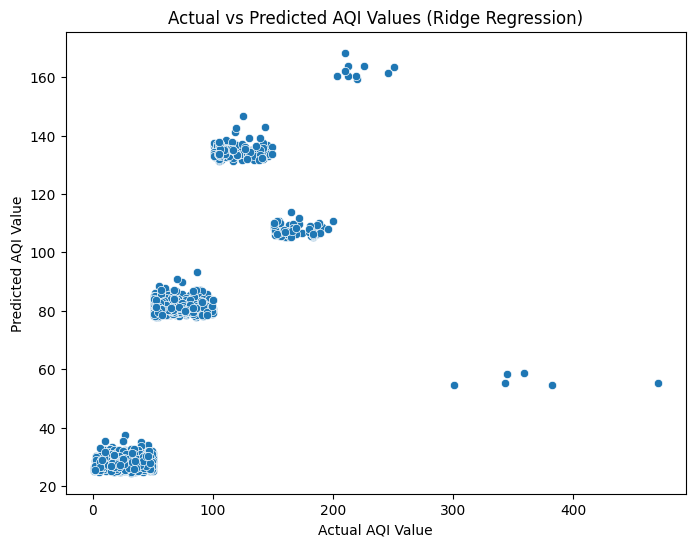


Training Random Forest Regressor...
Validation Set Evaluation for Random Forest Regressor:
Mean Absolute Error (MAE): 8.31526085176085
Mean Squared Error (MSE): 120.83685686742425
R-squared (R2): 0.9382484269721004

Test Set Evaluation for Random Forest Regressor:
Mean Absolute Error (MAE): 8.599826332251746
Mean Squared Error (MSE): 148.69633275053903
R-squared (R2): 0.9315707512715021


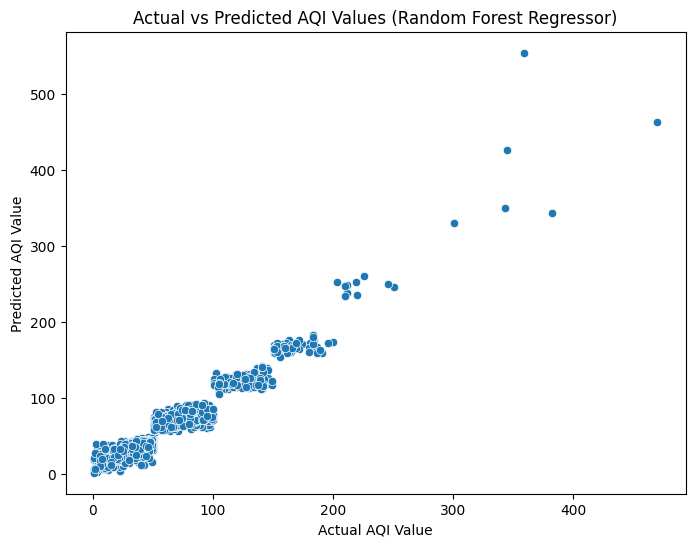


Model Comparison Results:
                         Validation MAE  Validation MSE  Validation R2  \
Linear Regression             16.273152      703.146943       0.640669   
Ridge Regression              16.272753      703.142043       0.640671   
Random Forest Regressor        8.315261      120.836857       0.938248   

                          Test MAE    Test MSE   Test R2  
Linear Regression        16.606318  790.099388  0.636401  
Ridge Regression         16.606105  790.099672  0.636400  
Random Forest Regressor   8.599826  148.696333  0.931571  

Best Ridge Parameters from GridSearchCV:
{'alpha': 10}

Ridge Regression with Best Parameters:
Validation MAE: 16.26916857486875
Test MAE: 16.604216413322117


In [87]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('dataset/data_date.csv')

# Feature engineering
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Encoding categorical features
df['Country'] = df['Country'].astype('category').cat.codes
df['Status'] = df['Status'].astype('category').cat.codes

# Lag features for AQI (previous day's AQI)
df['Lag_1'] = df['AQI Value'].shift(1)
df['Lag_2'] = df['AQI Value'].shift(2)

# Dropping rows with NaN values caused by lag features
df.dropna(inplace=True)

# Selecting features (X) and target (y)
X = df[['Country', 'Year', 'Month', 'Day', 'Status', 'Lag_1', 'Lag_2']]
y = df['AQI Value']

# Splitting the data into 80% training, 10% validation, and 10% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardizing the data (important for models like Ridge regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store results
results = {}

# Training and evaluating models
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_val_pred = model.predict(X_val_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Store evaluation metrics
    results[model_name] = {
        'Validation MAE': mean_absolute_error(y_val, y_val_pred),
        'Validation MSE': mean_squared_error(y_val, y_val_pred),
        'Validation R2': r2_score(y_val, y_val_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Test MSE': mean_squared_error(y_test, y_test_pred),
        'Test R2': r2_score(y_test, y_test_pred)
    }
    
    # Print model evaluation
    print(f"Validation Set Evaluation for {model_name}:")
    print(f"Mean Absolute Error (MAE): {results[model_name]['Validation MAE']}")
    print(f"Mean Squared Error (MSE): {results[model_name]['Validation MSE']}")
    print(f"R-squared (R2): {results[model_name]['Validation R2']}")
    
    print(f"\nTest Set Evaluation for {model_name}:")
    print(f"Mean Absolute Error (MAE): {results[model_name]['Test MAE']}")
    print(f"Mean Squared Error (MSE): {results[model_name]['Test MSE']}")
    print(f"R-squared (R2): {results[model_name]['Test R2']}")
    
    # Plot Actual vs Predicted
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_test_pred)
    plt.title(f'Actual vs Predicted AQI Values ({model_name})')
    plt.xlabel('Actual AQI Value')
    plt.ylabel('Predicted AQI Value')
    plt.show()

# Comparing results of models
comparison_df = pd.DataFrame(results).T
print("\nModel Comparison Results:")
print(comparison_df)

# Hyperparameter tuning for Ridge Regression using GridSearchCV
ridge_param_grid = {'alpha': [0.1, 1, 10, 100]}
ridge_grid_search = GridSearchCV(Ridge(), ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train_scaled, y_train)

print("\nBest Ridge Parameters from GridSearchCV:")
print(ridge_grid_search.best_params_)

# Final evaluation of Ridge model with best parameters
ridge_best_model = ridge_grid_search.best_estimator_
y_val_pred = ridge_best_model.predict(X_val_scaled)
y_test_pred = ridge_best_model.predict(X_test_scaled)

print("\nRidge Regression with Best Parameters:")
print(f"Validation MAE: {mean_absolute_error(y_val, y_val_pred)}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred)}")
